### **Import libraries:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


### **Load Data:**

In [12]:
df_cf = pd.read_csv('..\Data\Cleaned_Student_Performance_data.csv')
df_cf.head()



<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Cash\AppData\Local\Temp\ipykernel_9656\2133171854.py:1: SyntaxWarning: invalid escape sequence '\D'
  df_cf = pd.read_csv('..\Data\Cleaned_Student_Performance_data.csv')


,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,15.408756,0,0,1,0,0,0,0,1
1,4.210570,26,0,2,0,0,0,0,4
2,10.028829,14,0,3,1,0,0,0,3
3,4.672495,17,1,3,0,0,0,0,4
4,8.191219,0,0,1,1,0,0,0,1


### **Data Preprocessing:**

In [3]:
# Assigning the independent variables to the X and the dependent variables to y.

X= df_cf.iloc[:,:-1].values # Drops column "GradeClass"and stores all the other column values in a array
y= df_cf.iloc[:,-1].values # Stores the values of the "GradeClass" column in a array.

# Splits the data into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the x values 
sc = StandardScaler() # Scales the unit variance and removes the mean of the x_training data.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### **Cumulative Ordinal Regression(Coral) Method:**

The CORAL method is a method to convert **ordinal data(0, 1, 2, 3,...)** into a binary format **(0 = 0000, 1 = 0001, 2 = 0010)**.

In [4]:
# Function for converting the ordinal data of Gradeclass into binary data
def coral_target(y, num_classes): 
    thresholds = np.arange(num_classes - 1) # Sets the limits for the binary data
    return (y[:, None] > thresholds).astype(int) # Returns the converted binary values.

num_classes = len(np.unique(y)) # Counts the number of labels in our "GradeClass"
y_train_coral = coral_target(y_train, num_classes)
y_test_coral = coral_target(y_test, num_classes)

### **Artificail Neural Network Deep-learning Model:**

#### **Building the ANN model:**

In [5]:
ANN = models.Sequential([  #Initializes the ANN
    
    # Input layer
    layers.Input(shape=(X.shape[1],)), #Takes one column as input at a time.

    # Hidden layer 
    layers.Dense(units=128, activation='relu'), # Sorts through all of the probabilities using a 128 nodes.
    layers.Dropout(0.3),

    # Hidden Layer:
    layers.Dense(units=32, activation='relu'),
    

    # Output layer
    layers.Dense(num_classes - 1, activation='sigmoid')  # One sigmoid per threshold
])



#### **Training the ANN:**

In [6]:
# Compiling the ANN
ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #This tells the model how to train

# Fitting the training data into the model
ANN.fit(X_train, y_train_coral, epochs=40, batch_size=32, validation_data=(X_test, y_test_coral))

Epoch 1/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4534 - loss: 0.6243 - val_accuracy: 0.9077 - val_loss: 0.4192
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8694 - loss: 0.3635 - val_accuracy: 1.0000 - val_loss: 0.2312
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9843 - loss: 0.2115 - val_accuracy: 0.9415 - val_loss: 0.1551
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8766 - loss: 0.1733 - val_accuracy: 0.8585 - val_loss: 0.1308
Epoch 5/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7548 - loss: 0.1393 - val_accuracy: 0.8646 - val_loss: 0.1217
Epoch 6/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8077 - loss: 0.1406 - val_accuracy: 0.9046 - val_loss: 0.1176
Epoch 7/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8341 - loss: 0.1227 - val_accuracy: 0.9231 - val_loss: 0.1127
Epoch 8/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8692 - loss: 0.1184 - val_accuracy: 0.9385 - val_loss

### **Predicting GradeClass:**

In [7]:
def ANN_predict(y_pred_sigmoids): # Converts the predicted binary values back into ordinal values.
    return np.sum(y_pred_sigmoids > 0.5, axis=1)

# Predicts Grade class in binary format
y_pred_sigmoids = ANN.predict(X_test)

# Converts the Grade Class values back into ordinal data
y_pred_classes = ANN_predict(y_pred_sigmoids)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


### **Evaluating predicted data:**

#### **Evaluation:**

In [8]:
# Evaluation of the predicted data
print(classification_report(y_test, y_pred_classes)) #Outputs a summary of the models performance

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1       0.71      0.76      0.73        38
           2       0.61      0.75      0.67        40
           3       0.67      0.59      0.62        51
           4       0.95      0.94      0.94       185

    accuracy                           0.82       325
   macro avg       0.74      0.72      0.72       325
weighted avg       0.83      0.82      0.82       325



#### **Displaying evaluated data:**

In [9]:
# Creates a table for the actual & predicted data
df_results = pd.DataFrame({     
    "Actual": y_test,
    "Predicted": y_pred_classes
})
df_results.head(10)


,Actual,Predicted
0,2,2
1,3,3
2,1,1
3,2,2
4,3,3
5,4,4
6,2,2
7,4,4
8,4,4
9,4,4


#### **Visualising evaluated data:**

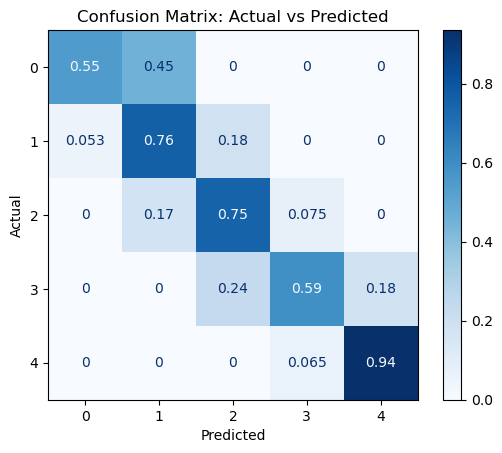

In [10]:
cm = confusion_matrix(y_test, y_pred_classes)
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1, 2, 3, 4])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Actual vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

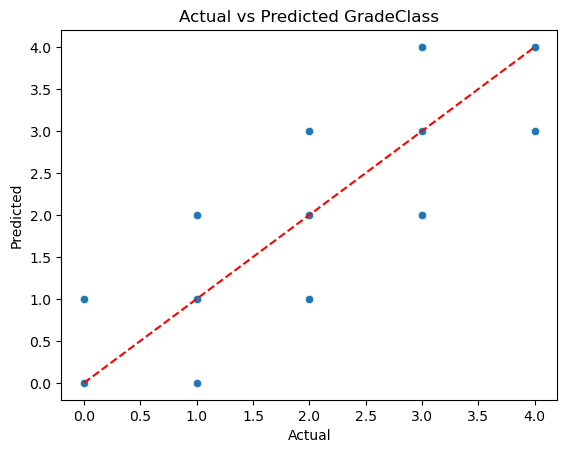

In [11]:
sns.scatterplot(data=df_results, x="Actual", y="Predicted")
plt.title("Actual vs Predicted GradeClass")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()